<a href="https://colab.research.google.com/github/allisson2156/Analise-Suicidios-Shangdong/blob/main/AnaliseDadosShangDong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('SuicideChina.csv')
df.head()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [7]:
#Verificando a existência de valores nulos
df.isna().sum()

Unnamed: 0      0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64

In [8]:
#Excluindo colunas desnecessárias 
df.drop(['Unnamed: 0', 'Person_ID'], axis = 1, inplace = True)

In [9]:
#Contando os valores das colunas 
print(df['Hospitalised'].value_counts())
print('-'*30)
print(df['Died'].value_counts())
print('-'*30)
print(df['Urban'].value_counts())
print('-'*30)
print(df['Education'].value_counts())
print('-'*30)
print(df['Occupation'].value_counts())
print('-'*30)
print(df['method'].value_counts())

yes    1553
no     1018
Name: Hospitalised, dtype: int64
------------------------------
no     1315
yes    1256
Name: Died, dtype: int64
------------------------------
no         2213
yes         277
unknown      81
Name: Urban, dtype: int64
------------------------------
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64
------------------------------
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64
------------------------------
Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64


In [10]:
#Média de idade por ano 
dfGroupedAge = df.groupby('Year')['Age'].mean().round(0)
print(dfGroupedAge)

Year
2009    53.0
2010    53.0
2011    52.0
Name: Age, dtype: float64


In [11]:
#Média de maior indice em mês por ano 
dfGroupedDeit = df.groupby('Year')['Month'].mean().round()
print(dfGroupedDeit)

Year
2009    6.0
2010    6.0
2011    6.0
Name: Month, dtype: float64


Text(0.5, 1.0, 'Idade das Vitimas')

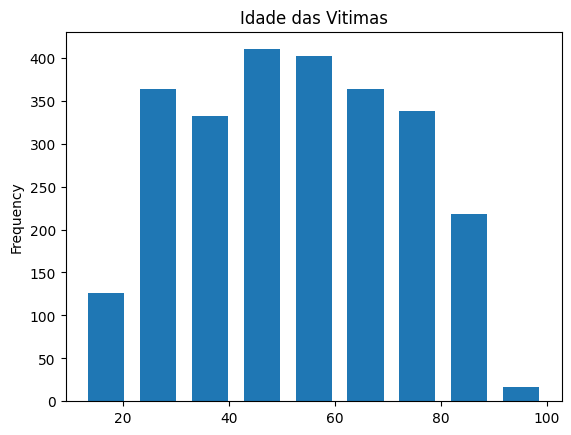

In [12]:
df['Age'].plot(kind='hist', bins=9, rwidth = 0.7, linewidth=0.5)
plt.style.use('dark_background')
plt.title('Idade das Vitimas')

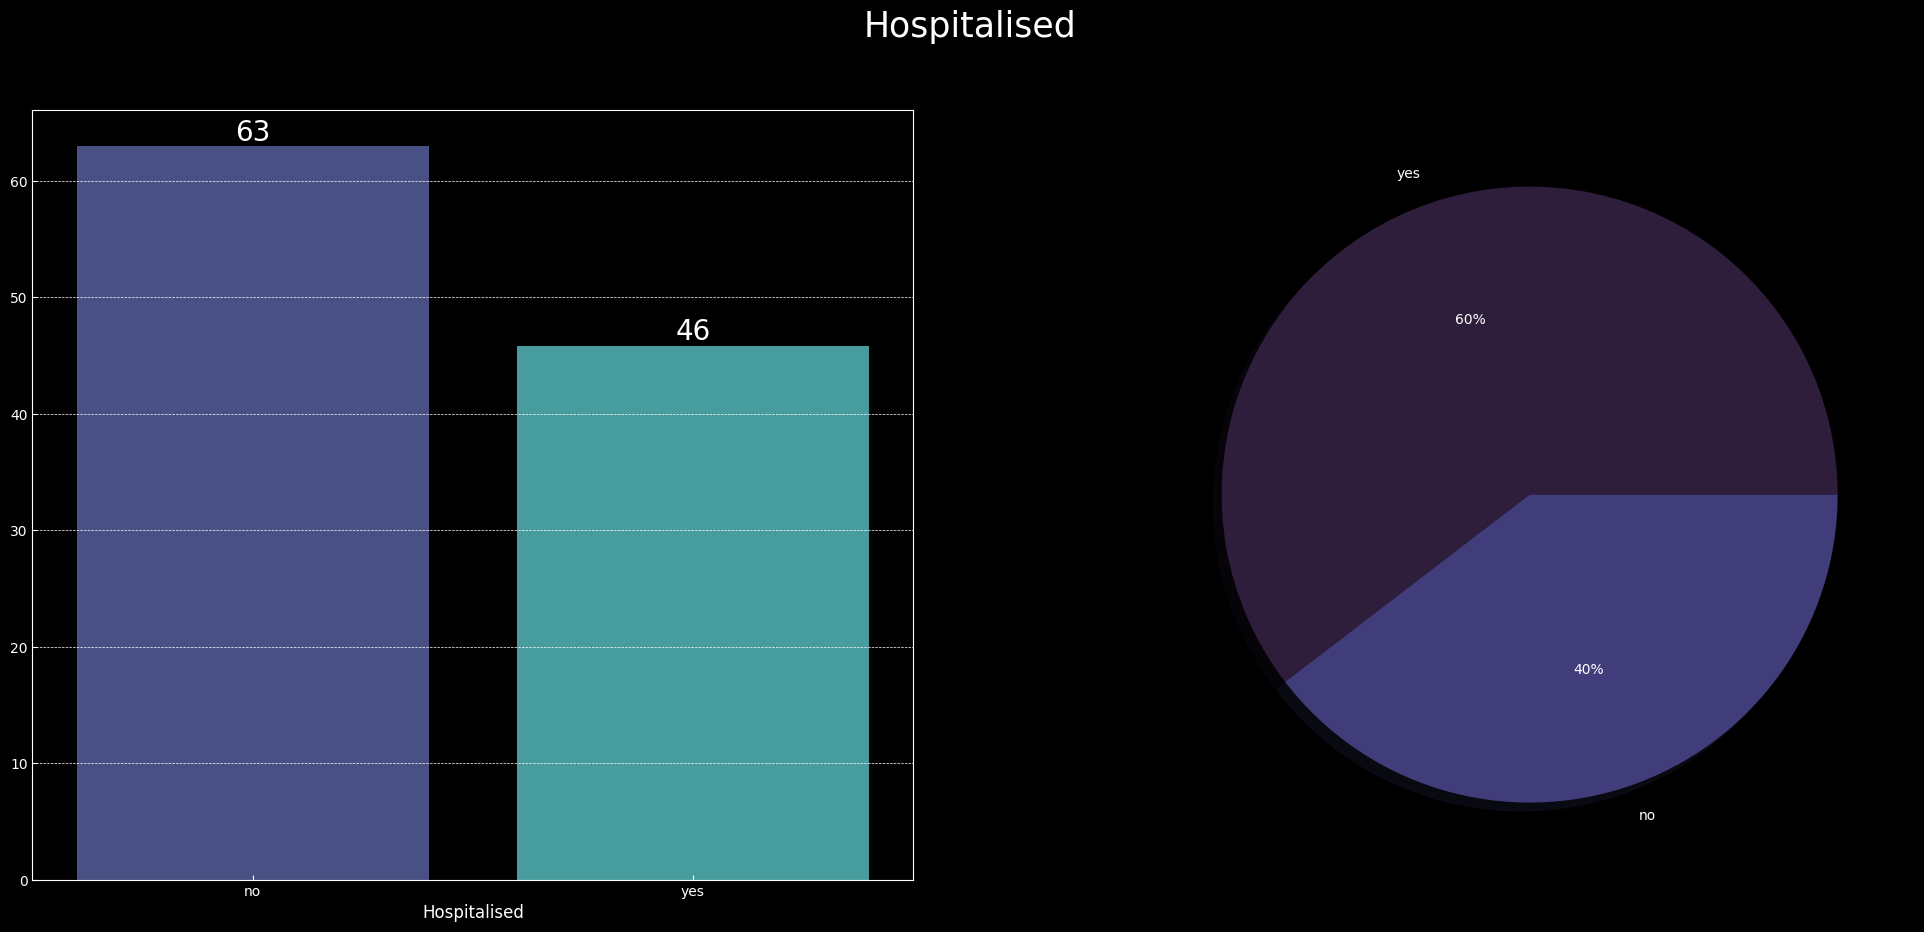

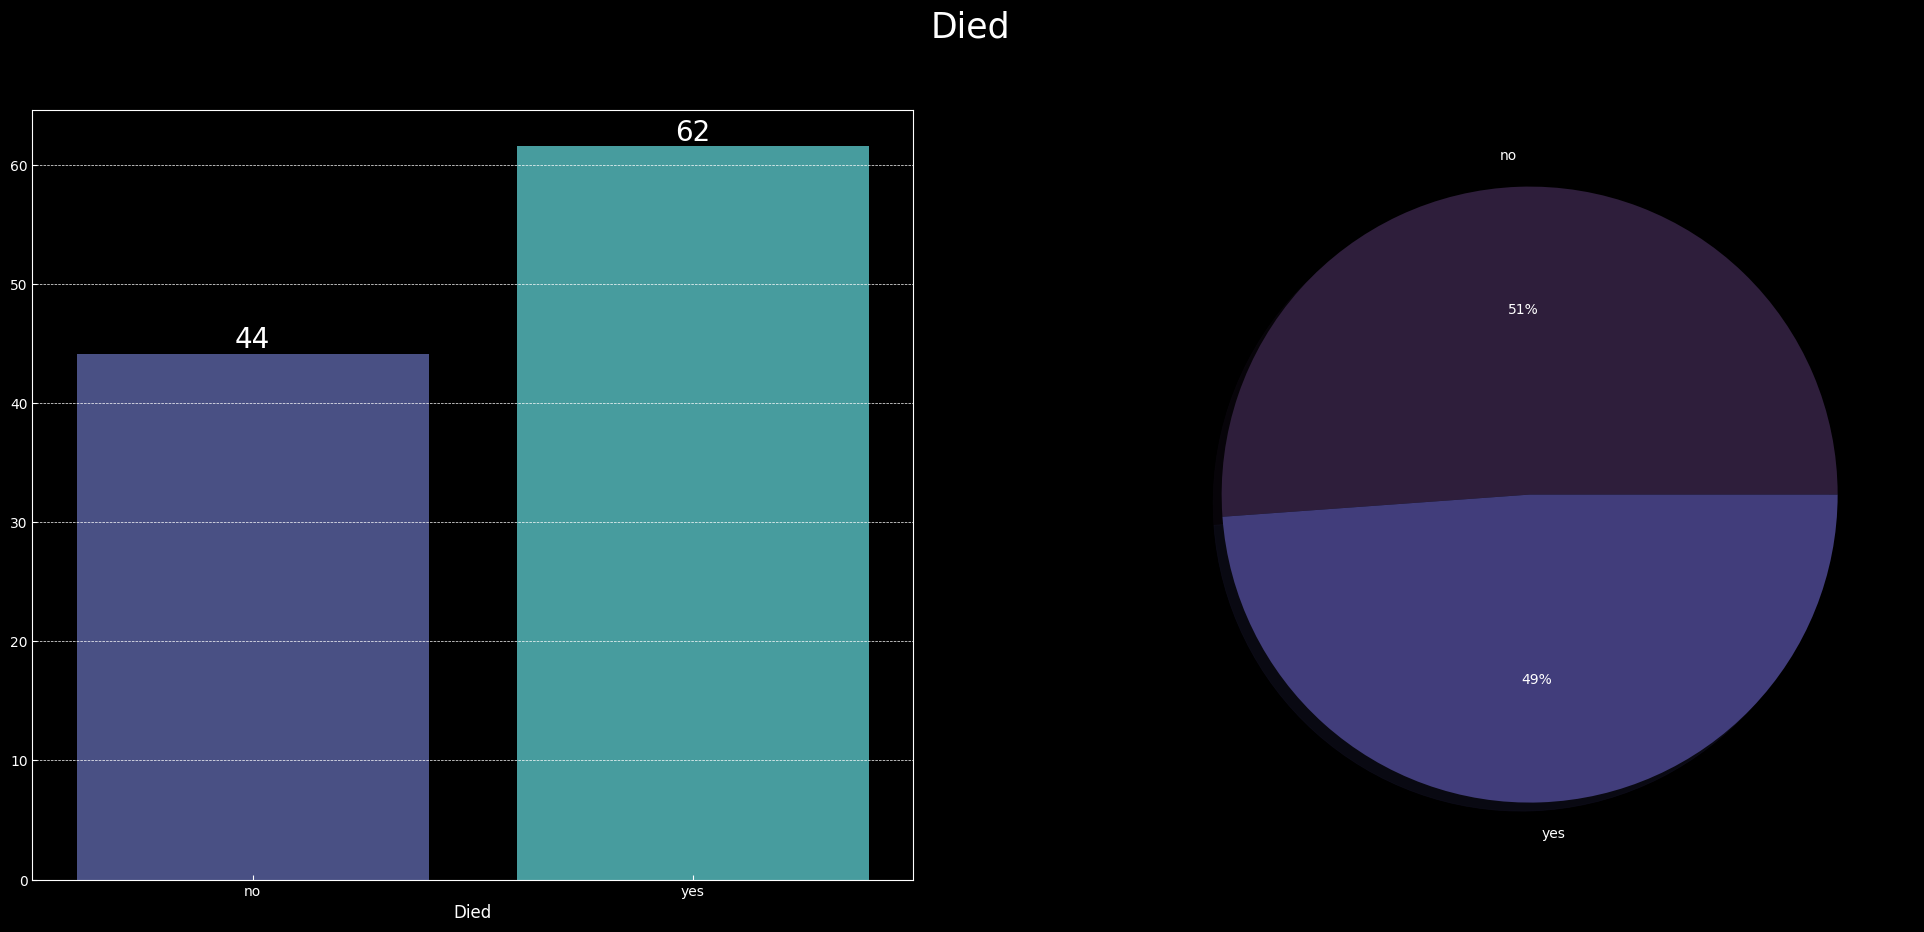

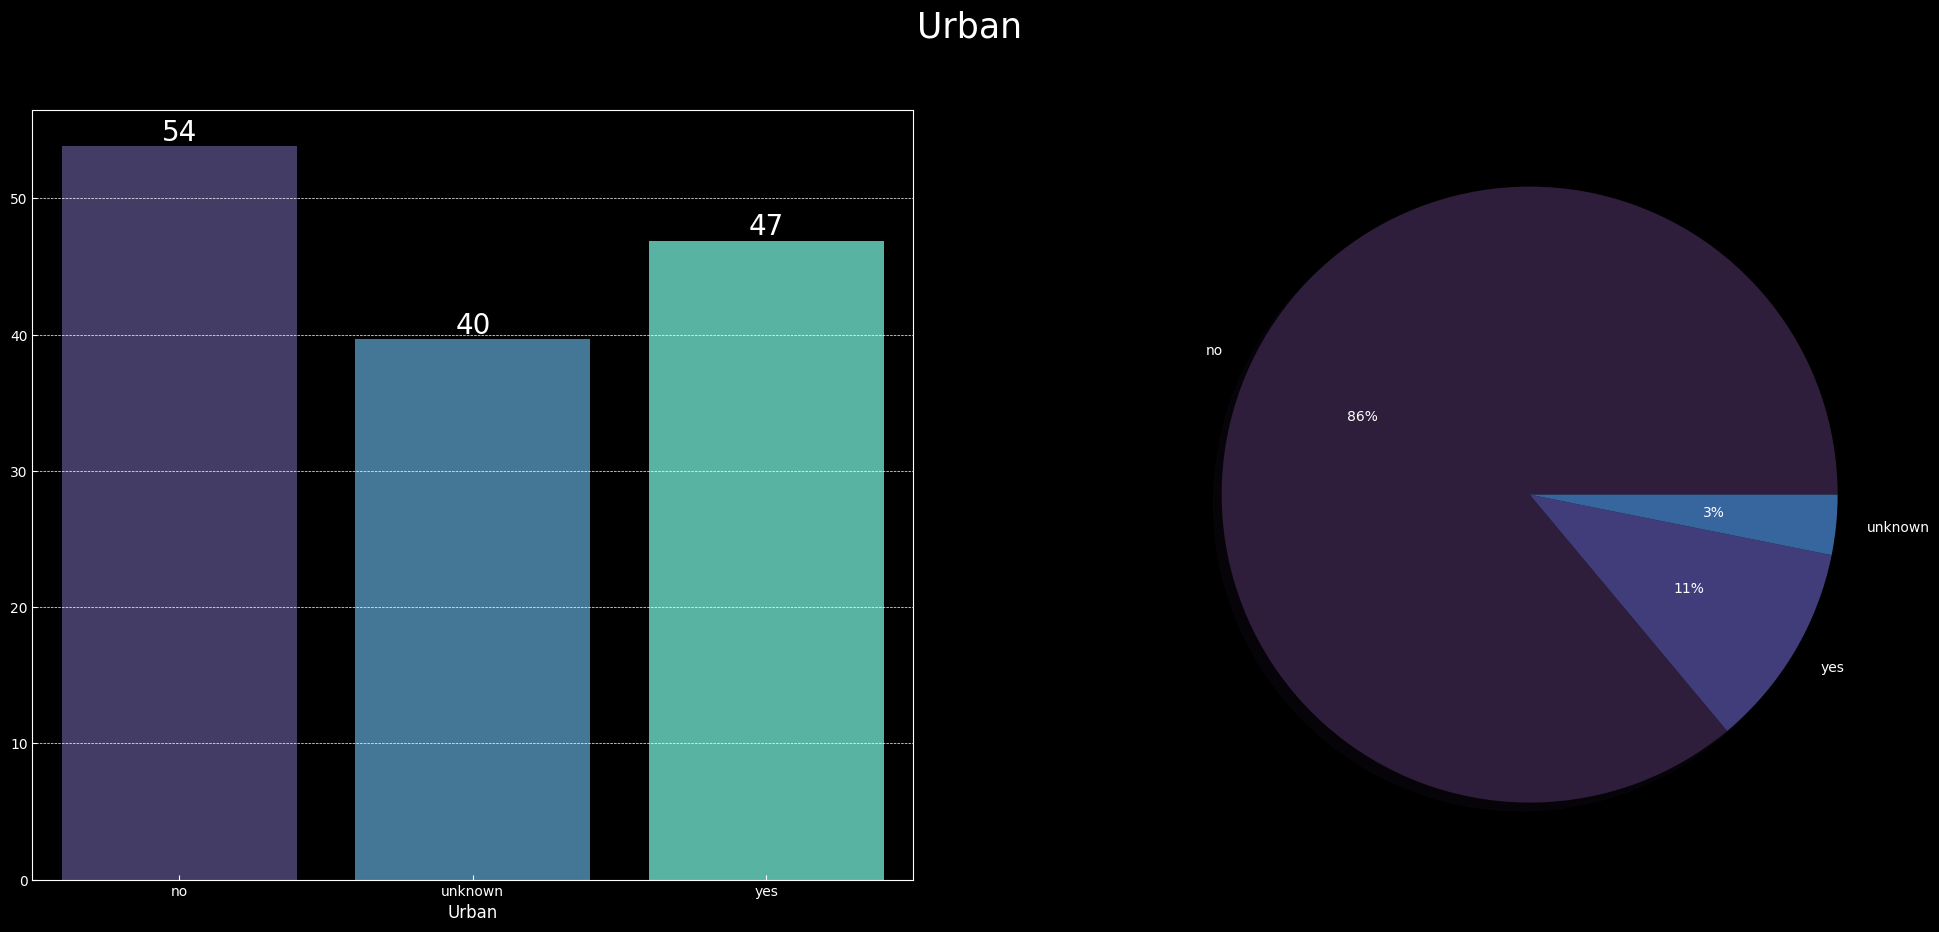

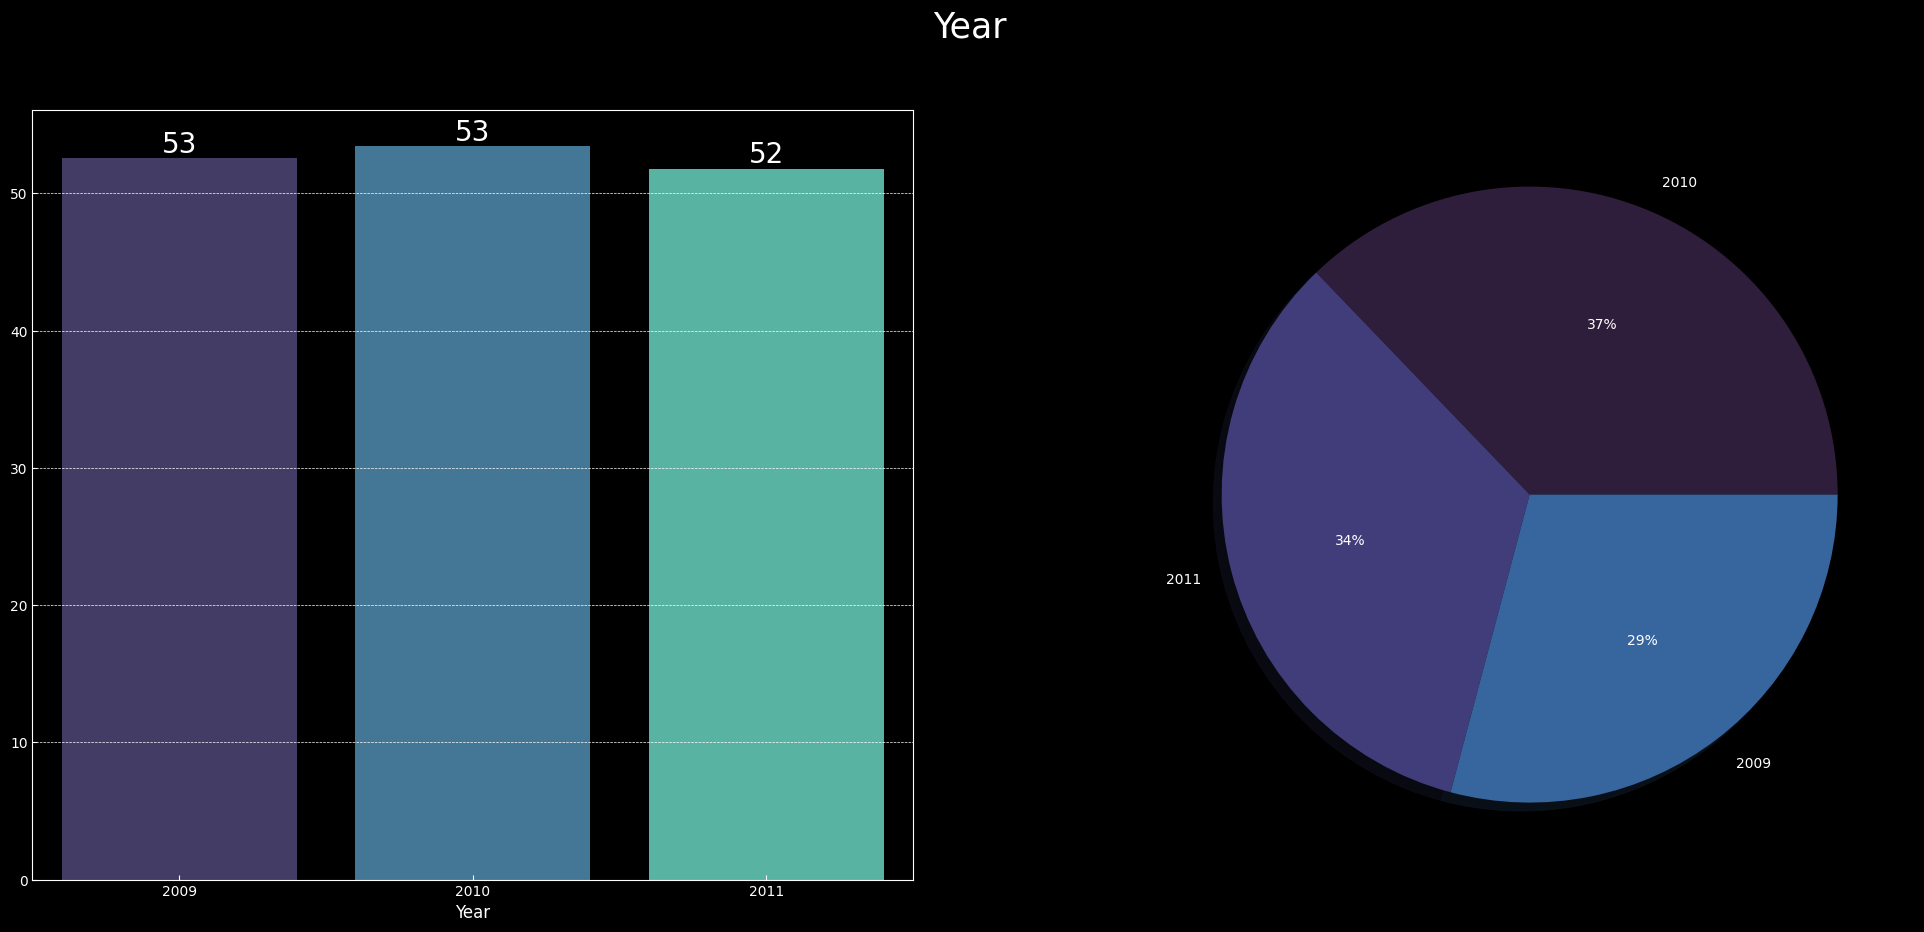

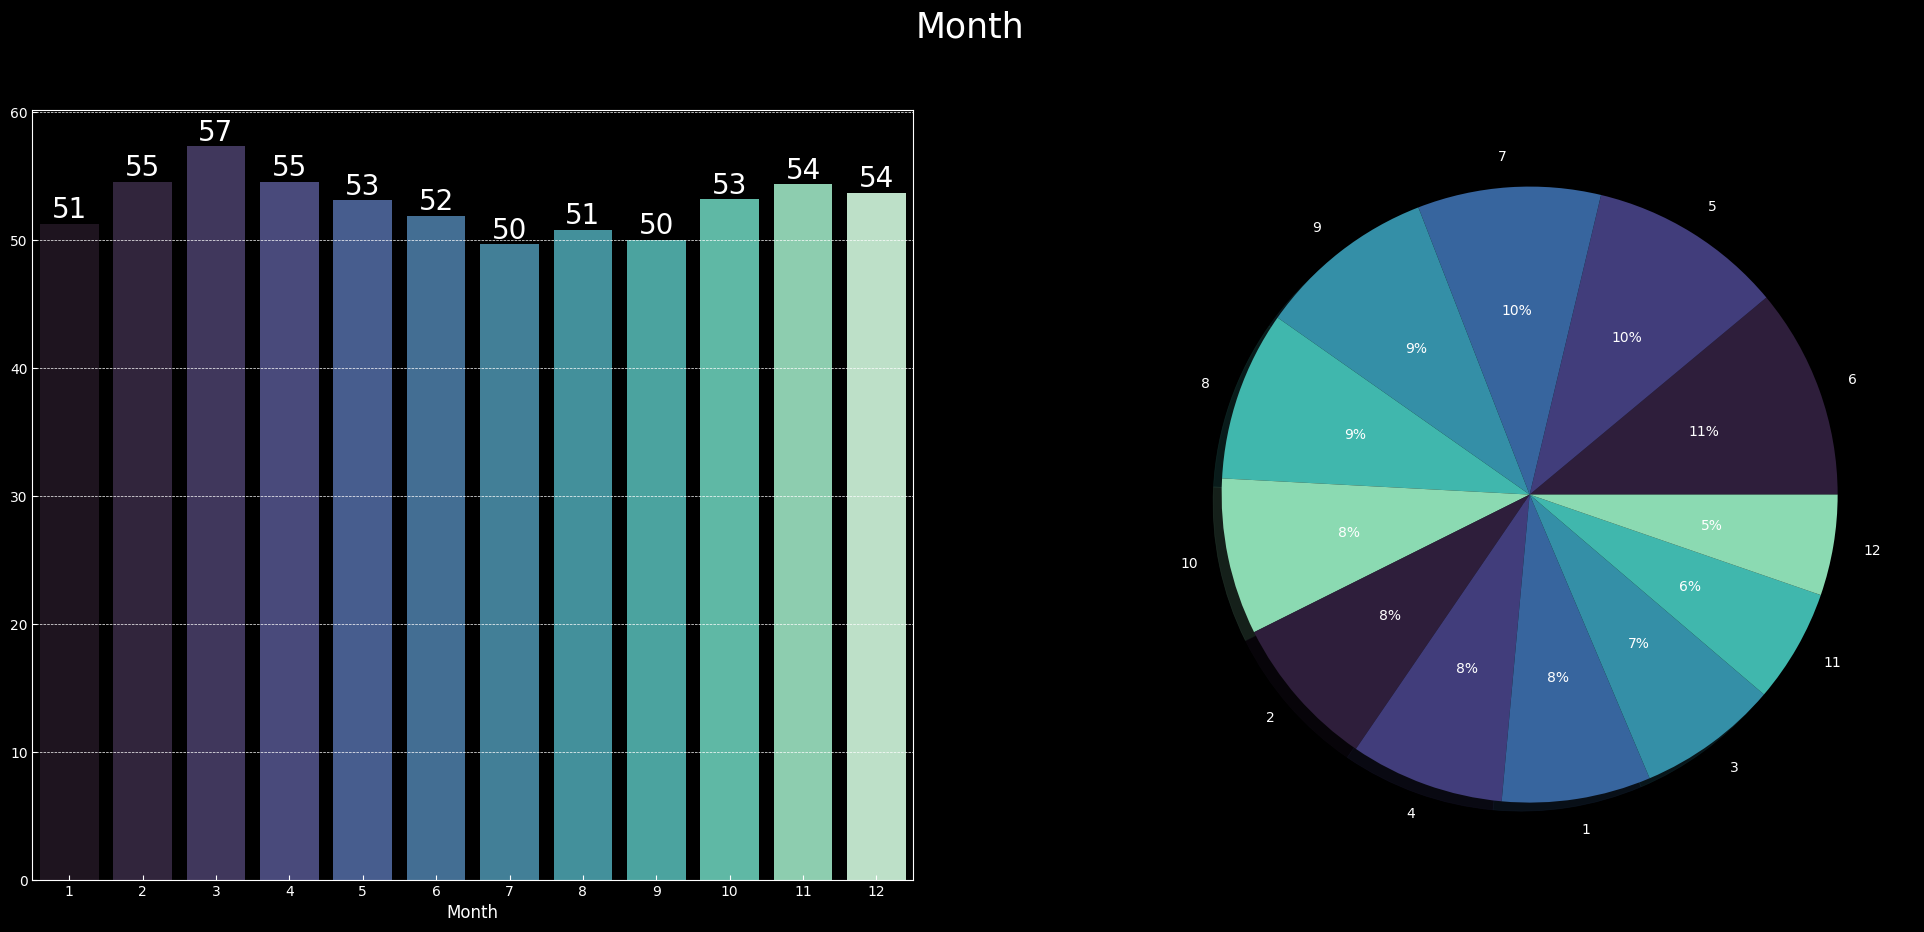

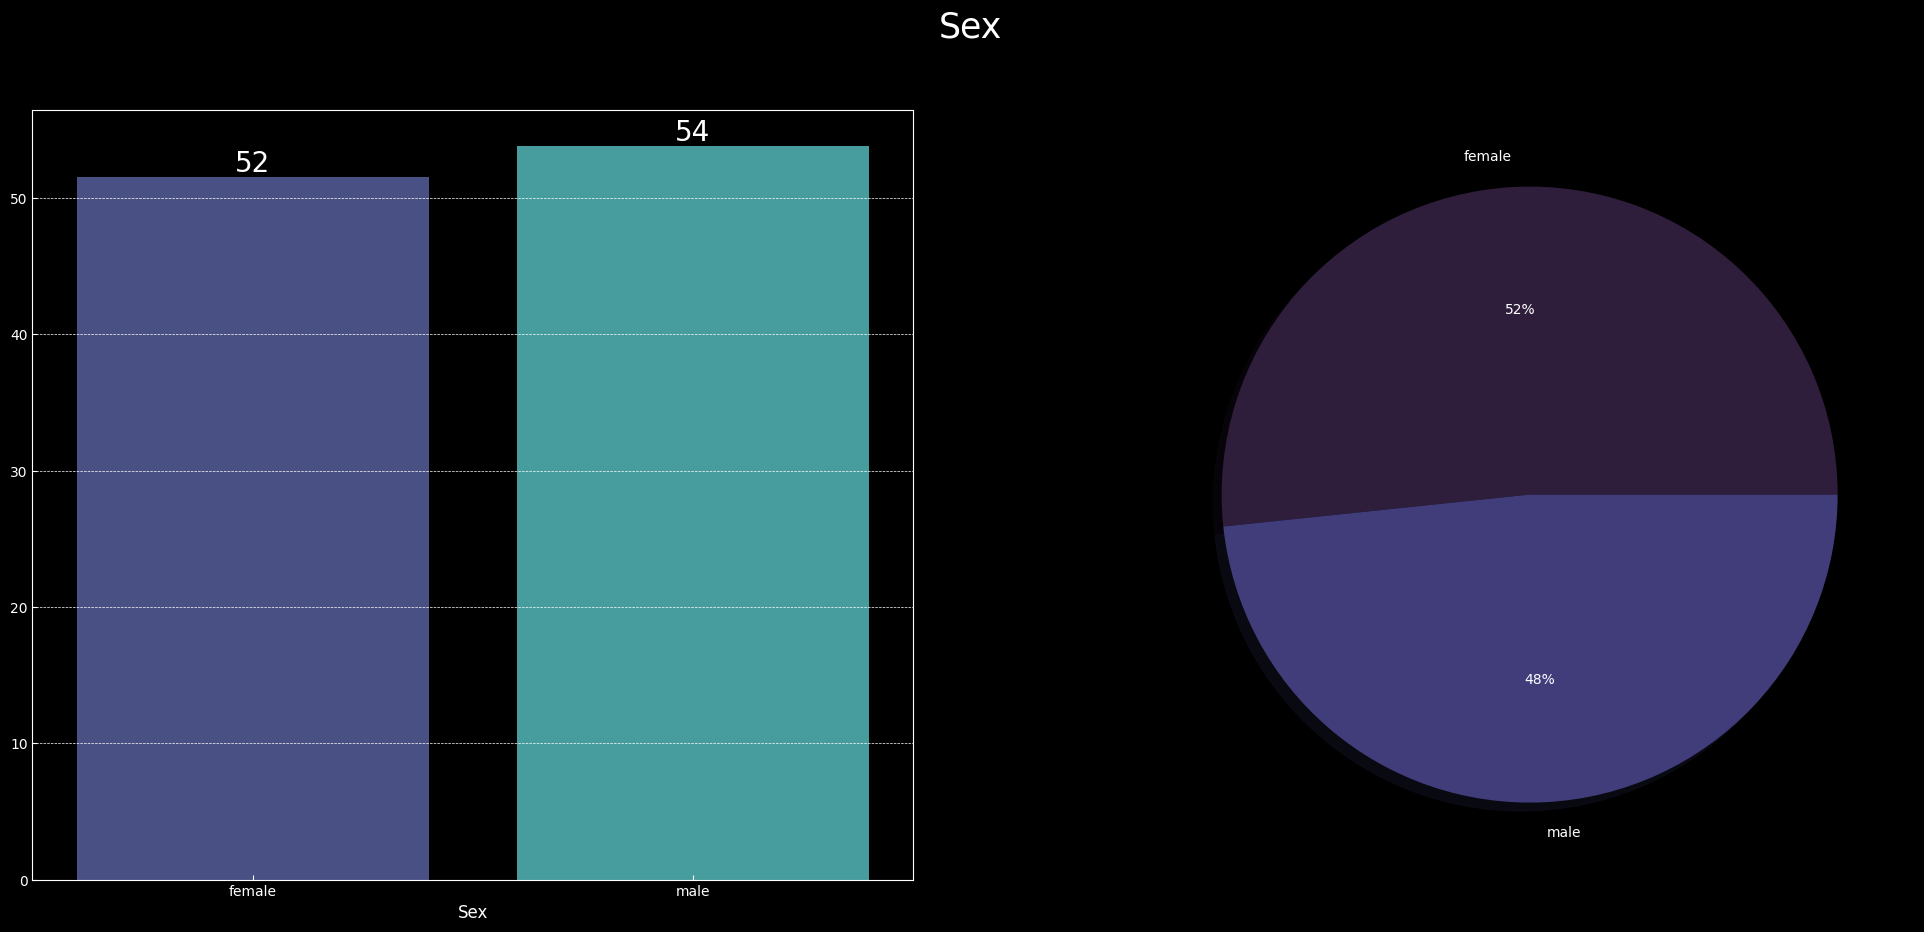

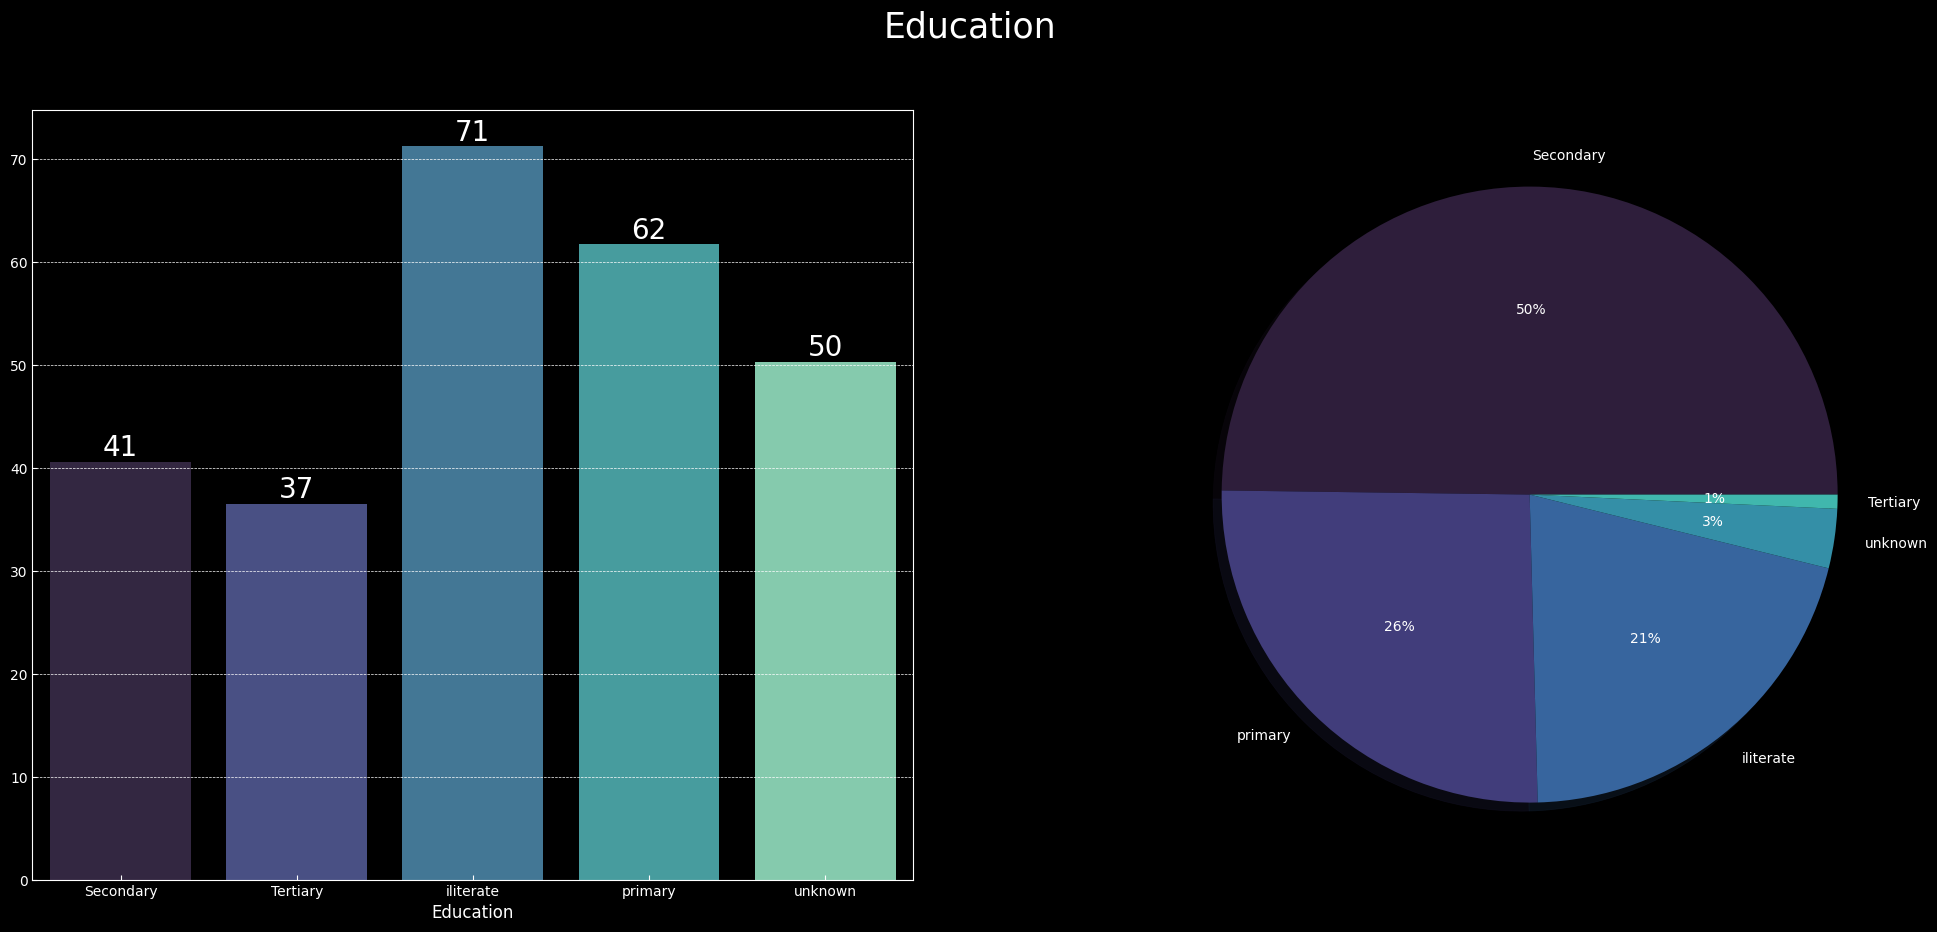

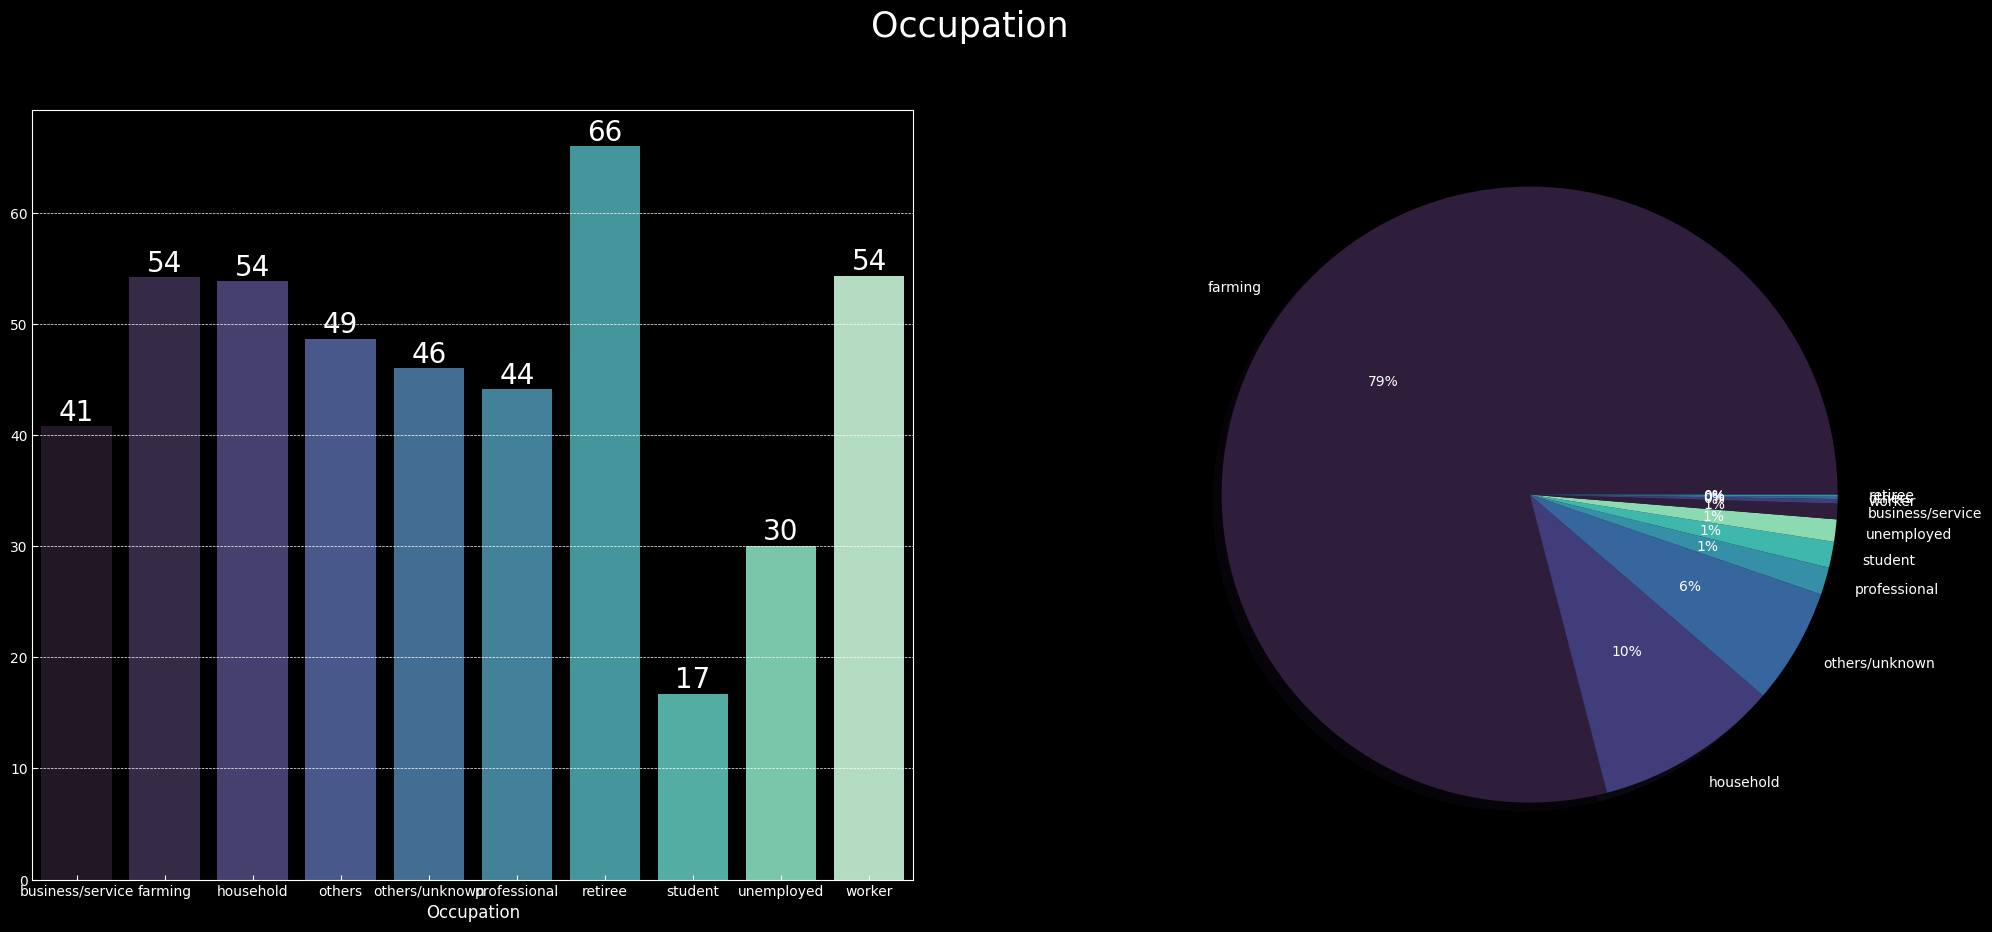

In [40]:
def plots(df, x):
    plt.style.use('dark_background')
    fig, ax = plt.subplots(1, 2, figsize=(25, 10))
    Group_data = df.groupby(x)
    
    sns.barplot(x=Group_data['Age'].mean().index, y=Group_data['Age'].mean().values, ax=ax[0], palette='mako')
    
    for container in ax[0].containers:
      ax[0].bar_label(container, color='white', size=20, fmt='%.0f')

    palette_color = sns.color_palette('mako')
    plt.pie(x=df[x].value_counts(),
            labels=df[x].value_counts().index,
            autopct='%.0f%%',
            shadow=True,
            colors=palette_color)
    plt.suptitle(x, fontsize=25)
    plt.show()

for i in df.columns:
    if i != 'Age' and i != 'method':
        plots(df, i)
    

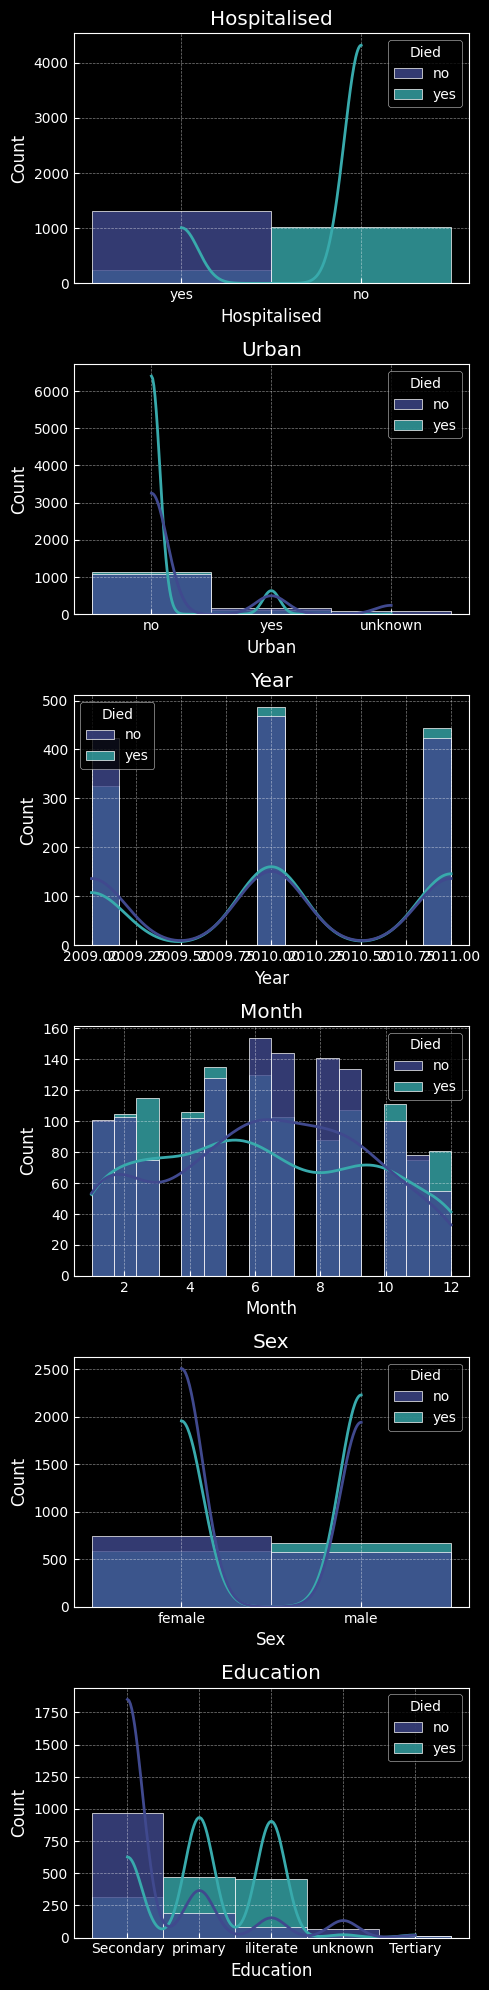

In [64]:
plt.style.use('dark_background')

fig, axs = plt.subplots(len(df.columns)-4, 1, figsize=(5, 20))

subplot_index = 0
for feature in df.columns:
    if feature not in ['Age', 'method', 'Occupation', 'Died']:
        sns.histplot(data=df, x=feature, kde=True, palette='mako', hue='Died', alpha=0.8, ax=axs[subplot_index])
        axs[subplot_index].set_title(feature)
        axs[subplot_index].grid(alpha=0.5)
        subplot_index += 1

plt.tight_layout()
plt.show()


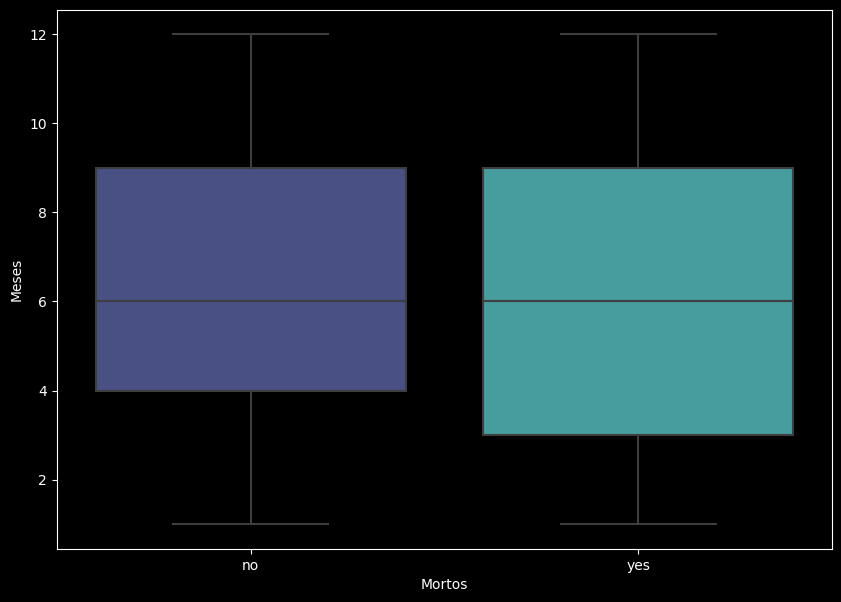

In [ ]:
plt.figure(figsize = (10, 7))
plt.style.use('dark_background')

sns.boxplot(x='Died', y='Month', data=df, palette='mako')
plt.xlabel('Mortos')
plt.ylabel('Meses')
plt.show()


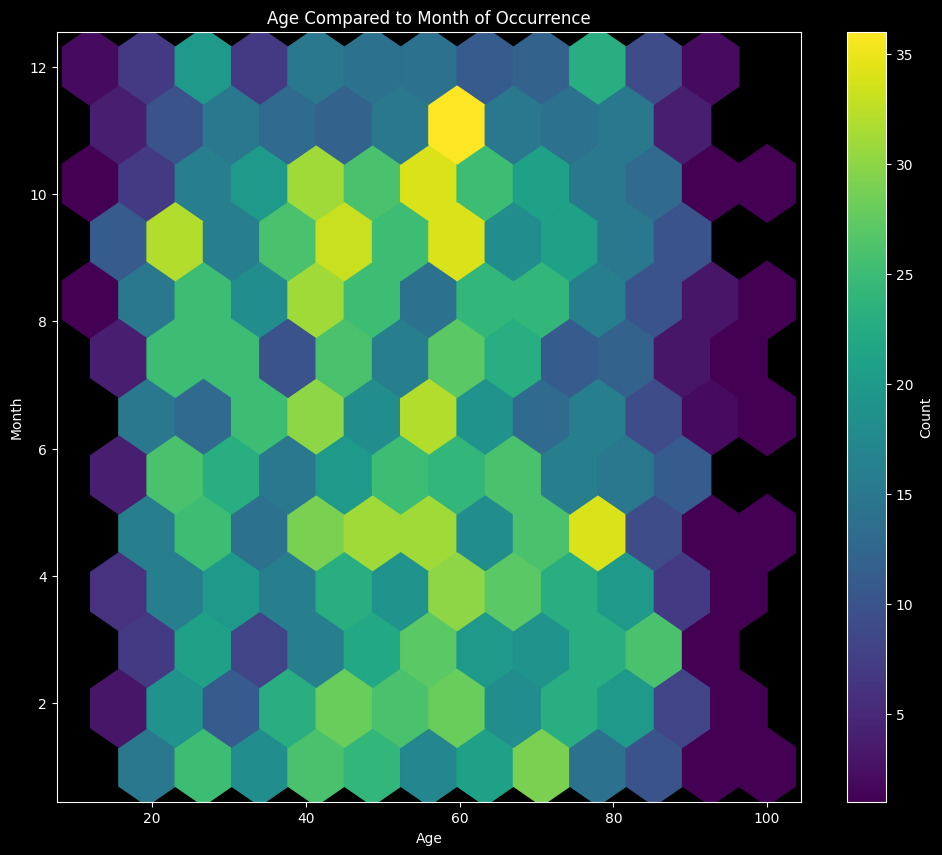

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (12, 10))

plt.hexbin(df['Age'], df['Month'], gridsize = 12, cmap = 'viridis', mincnt = 1)
plt.colorbar(label = 'Count')
plt.xlabel('Age')
plt.ylabel('Month')
plt.title('Age Compared to Month of Occurrence')
plt.show()

In [1]:
plt.style.use('dark_background')
plt.figure(figsize = (10, 5))

plt.hexbin(df['Age'], df['Year'], gridsize = 3, cmap = 'viridis', mincnt = 1)
plt.colorbar(label = 'Count')
plt.xlabel('Age')
plt.ylabel('Year')
plt.title('Idade Comparda com o Ano da Ocorrência')
plt.show()

NameError: ignored